In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = data.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [5]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++',random_state = 25)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

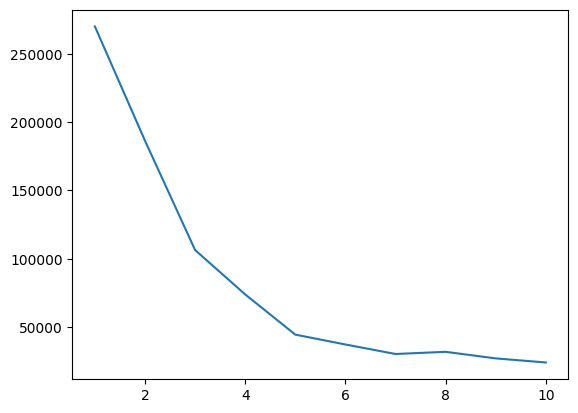

In [6]:
plt.figure()
plt.plot(range(1,11),wcss)

In [8]:
kmeans = KMeans(n_clusters=7,init='k-means++',random_state=25)
y = kmeans.fit_predict(X)

In [11]:
from collections import Counter
count = Counter(y)
count

Counter({np.int32(1): 79,
         np.int32(5): 28,
         np.int32(0): 27,
         np.int32(4): 23,
         np.int32(3): 22,
         np.int32(2): 11,
         np.int32(6): 10})

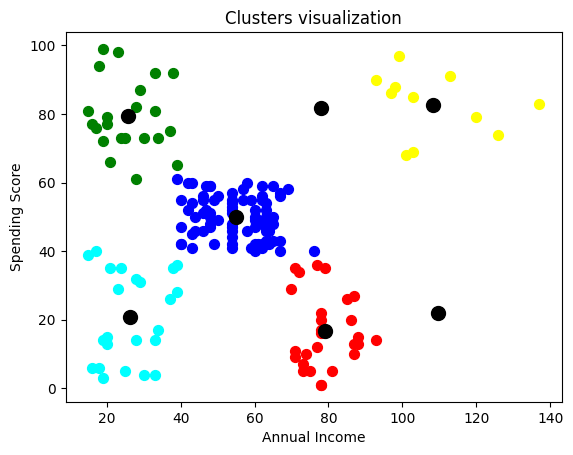

In [12]:
# Plot the clusters
plt.scatter(X[y==0,0],X[y==0,1],s=50,c='red',label="Cluster0")
plt.scatter(X[y==1,0],X[y==1,1],s=50,c='blue',label="Cluster1")
plt.scatter(X[y==2,0],X[y==2,1],s=50,c='yellow',label="Cluster2")
plt.scatter(X[y==3,0],X[y==3,1],s=50,c='green',label="Cluster3")
plt.scatter(X[y==4,0],X[y==4,1],s=50,c='cyan',label="Cluster4")

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=100,color='black',label='Centroids')

plt.title("Clusters visualization")
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()